In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [5]:
tf.test.is_built_with_cuda()

True

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train[0:4000]

array([[6],
       [9],
       [9],
       ...,
       [3],
       [8],
       [4]], dtype=uint8)

In [11]:

def plot_sample(index):
    plt.figure(figsize=(100,3))
    plt.imshow(x_train[index])

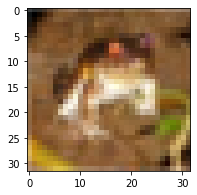

In [12]:
plot_sample(0)

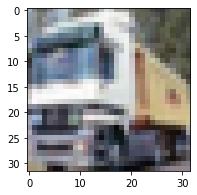

In [13]:
plot_sample(1)

In [19]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [31]:
x_train_scaled.shape

(50000, 32, 32, 3)

In [43]:
y_train_categorical=keras.utils.to_categorical(
    y_train, num_classes=10,dtype= 'float32'
)

In [44]:
y_train_categorical.shape

(50000, 10)

In [46]:

model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8085 - accuracy: 0.3541
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6220 - accuracy: 0.4277
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5394 - accuracy: 0.4579
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4802 - accuracy: 0.4787
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4319 - accuracy: 0.4954
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3894 - accuracy: 0.5130
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3480 - accuracy: 0.5266
Epoch 8/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3168 - accuracy: 0.5359
Epoch 9/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2830 - accuracy: 0.5518
Epoch 10/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.249

In [48]:
model.predict(x_test_scaled)

array([[5.0175107e-01, 1.6555697e-01, 9.2626452e-01, ..., 1.6797309e-04,
        4.4934925e-01, 1.5808441e-01],
       [9.8496836e-01, 9.9324799e-01, 2.4993242e-01, ..., 3.7458669e-02,
        9.9999416e-01, 9.9942774e-01],
       [9.9673635e-01, 9.5265442e-01, 2.2328566e-01, ..., 8.4231561e-01,
        9.9843520e-01, 9.8201847e-01],
       ...,
       [2.0214304e-01, 2.4912355e-03, 9.8469710e-01, ..., 2.8782472e-01,
        9.6761686e-01, 8.4752336e-02],
       [1.2992033e-01, 1.1540559e-01, 9.2787284e-01, ..., 8.7663554e-02,
        1.0247424e-01, 4.8985228e-02],
       [6.4714141e-02, 1.7448108e-01, 9.4926548e-01, ..., 9.7408110e-01,
        2.7279657e-01, 6.9250965e-01]], dtype=float32)

In [49]:
y_test[0][0]

3

In [50]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [52]:
classes[y_train[1][0]]

'truck'

In [54]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [55]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 83s 53ms/step - loss: 1.8139 - accuracy: 0.3540
1min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [57]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 7s 4ms/step - loss: 1.8124 - accuracy: 0.3541
12 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)



Here is the performance comparison for 1 epoch,

Epoch : 1	,CPU :  83 sec	,GPU : 7 sec



You can see that GPU is almost 15 times faster. We ran only one epoch for benchmarking but for actual training we have to run many epochs and also when data volume is big running deep learning without GPU can consume so much time. This is the reason why GPUs are becoming popular in the field of deep learning
